Summary of Ranking Parameters and Weightages- 2024
| S.No | Parameter                           | Marks | Weightage |
|------|-------------------------------------|-------|-----------|
| 1    | Teaching, Learning & Resources      | 100   | 0.30      |
| 2    | Research and Professional Practice  | 100   | 0.30      |
| 3    | Graduation Outcomes                 | 100   | 0.20      |
| 4    | Outreach and Inclusivity            | 100   | 0.10      |
| 5    | Perception                          | 100   | 0.10      |

Importing Libraries

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [124]:
file_path = 'Engineering.xlsx'
data = pd.read_excel(file_path)
data_long = pd.DataFrame()

In [125]:
data_sets = [
    (3, 7, 9),   
    (10, 14, 16),  
    (17, 21, 23)  
]

In [126]:
for start, end, score_col in data_sets:
    subset = data.iloc[2:, start-1:end]   
    subset.columns = ["TLR", "RPC", "GO", "OI", "Perception"]
    subset["Score"] = data.iloc[1:, score_col-1]
    data_long = pd.concat([data_long, subset], ignore_index=True)

In [127]:
data_long

,TLR,RPC,GO,OI,Perception,Score
0,91.15,94.68,83.64,69.7,84.24,87.87
1,76.03,89.23,88.02,74.11,73.43,81.93
2,79.63,89.47,77.45,71.41,77.24,81.08
3,84.28,77.28,74.29,61.35,73.59,76.83
4,72.3,74.36,88.31,70.95,43.47,73.1
...,...,...,...,...,...,...
721,48.24,7.69,44.98,45.14,1.63,30.45
722,36.01,5.71,51.45,54.74,21.04,30.37
723,63.62,0.17,36,35.76,4.33,30.35
724,52.14,1.26,46.87,47.57,2.02,30.35


In [128]:
data_long.head(3)

,TLR,RPC,GO,OI,Perception,Score
0,91.15,94.68,83.64,69.7,84.24,87.87
1,76.03,89.23,88.02,74.11,73.43,81.93
2,79.63,89.47,77.45,71.41,77.24,81.08


In [129]:
data_long.fillna(data_long.mean(), inplace=True)

C:\Users\VIVEK KUMAR\AppData\Local\Temp\ipykernel_16276\2507645906.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_long.fillna(data_long.mean(), inplace=True)


In [130]:
X = data_long[["TLR", "RPC", "GO", "OI", "Perception"]]
y = data_long["Score"]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
X_train.head(2), y_train.head(2)

(          TLR        RPC         GO         OI  Perception
 6    63.62000  67.630000  67.990000  59.710000   50.210000
 424  59.78957  21.954329  59.252076  54.332633   15.839797,
 6      63.97000
 424    43.39043
 Name: Score, dtype: float64)

In [133]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [134]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.7519308574800925


In [ ]:
import joblib
joblib.dump(model, "score_predictor_model.pkl")

In [138]:
new_data = pd.DataFrame({
    "TLR": [91.85],
    "RPC": [92.6],
    "GO": [83.78],
    "OI": [77.19],
    "Perception": [81.46]
})
predicted_scores = model.predict(new_data)
print(f'Score: {predicted_scores}')

Score: [84.3777]



image 1/1 c:\SIH-SmolLM\sih be\SIH_img_model\test_images\0.jpg: 448x640 3 stairss, 21.0ms
Speed: 4.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4


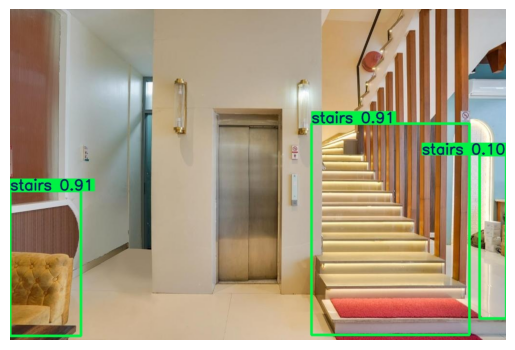

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os
import time
 
model = YOLO("best.pt")
 
image_path_input = "sih be\\SIH_img_model\\test_images\\0.jpg"
results = model(image_path_input, save=True, conf=0.10)
 
prediction_dirs = [d for d in os.listdir("runs/detect") if d.startswith("predict") and d[7:].isdigit()]
prediction_dirs.sort(key=lambda x: int(x.replace('predict', '')), reverse=True)   
latest_prediction_dir = os.path.join("runs", "detect", prediction_dirs[0])
 
predicted_image_path = os.path.join(latest_prediction_dir, "0.jpg")
 
time.sleep(1)
 
image = Image.open(predicted_image_path)
 
plt.imshow(image)
plt.axis('off')   
plt.show()
